# Taylor Expansions and Series solutions

**Instructor** : Camilla Marcellini -  cmarcellini@ucsd.edu

**TA**: Sam Schulz - s1schulz@ucsd.edu

Lecture notes adapted from 2024 Math Workshop Notes by Sam Schulz.

## 1. Introduction

Taylor expansions are a useful tool for when you have a function that is complicated to deal with. An example of this is the Coriolis parameter, which comes up in physical oceanography/geophysical fluid dynamics:
\begin{equation}
    f = 2 \Omega \cos(\phi),
\end{equation}
where $\Omega$ is the rotation frequency of the earth ($2\pi$/24 hr $\sim 7 \times 10^{-5}$ $ \text{s}^{-1}$). If an expression like this appears in an equation, especially a differential equation, it often can be useful to simplify it. With this motivation, let's use the function $f(x) = \cos(x)$ as a guiding example.


## 2. Taylor Expansions

A Taylor expansion (also called a Taylor series) is a method of rewriting a function as a sum of the function's derivatives evaluated at a single point. The formula (presented without proof) for the Taylor series of a function $f(x)$ about a point $x=a$ is:
\begin{align}
    f(x)&=f(a)+\frac{f^{\prime}(a)}{1!}(x-a)+\frac{f^{\prime \prime}(a)}{2!}(x-a)^2+\frac{f^{\prime \prime \prime}(a)}{3!}(x-a)^3+\cdots=
    \sum_{n=0}^{\infty} \frac{f^{(n)}(a)}{n!}(x-a)^n.
\end{align}
where the $'$ symbol denotes a derivative and the $!$ symbol is a factorial. The two lines of the above are equivalent, the second one is just there for those who feel comfortable with summation notation. We are assuming that the function $f(x)$ is infinitely differentiable at the point $x=a$,  i.e. that we can take its derivative an $\textit{infinite}$ number of times, to ensure the existence of the series. 

Equation (2) shows that a good approximation for $f(x)$ near $x=a$ is simply $f(a)$, and a closer one is $f(a)+\frac{f^{\prime}(a)}{1!}(x-a)+\frac{f^{\prime \prime}(a)}{2!}(x-a)^2$. You can add more and more terms to get closer to the true value, but of course each term you add makes things more complicated. Typically, you see the first one or two terms kept. 

In each term of Eq. (2), everything is a constant except the part that depends on $(x-a)$. This means each term gets really small when $x$ is close to $a$, and the larger the exponent on this $(x-a)$ part, the smaller the term overall. This property makes Taylor expansions a useful tool when you want to approximate a function in the vicinity of a certain value. When $(x-a)$ is sufficiently small, the first term of the Taylor series, $f(a)$, will be the most important/largest, followed by the second, $\frac{f^{\prime \prime}(a)}{2!}(x-a)^2$, followed by the third, and so on.


### 2.2 Building Intuition on Taylor Series

Physical functions are complex and difficult to calculate. One of the key techniques in Applied Mathematics is to approximate functions within certain domains. One of the most useful tools for local approximation is the Taylor series, which is built from derivatives. You already know that the first derivative gives the slope at a point, which lets us approximate a function near that point with a straight line. But instead of stopping there, can we extend this idea to higher-order polynomials—curves that better capture the behavior of the function—to reduce the error? 

This is exactly the idea behind the Taylor series, and why they are so commonly used in Applied Mathematics.
In Figure (1), we can see this in action: adding extra terms that involve higher derivatives improves the approximation of the function $f(x)=\cos(x)$.

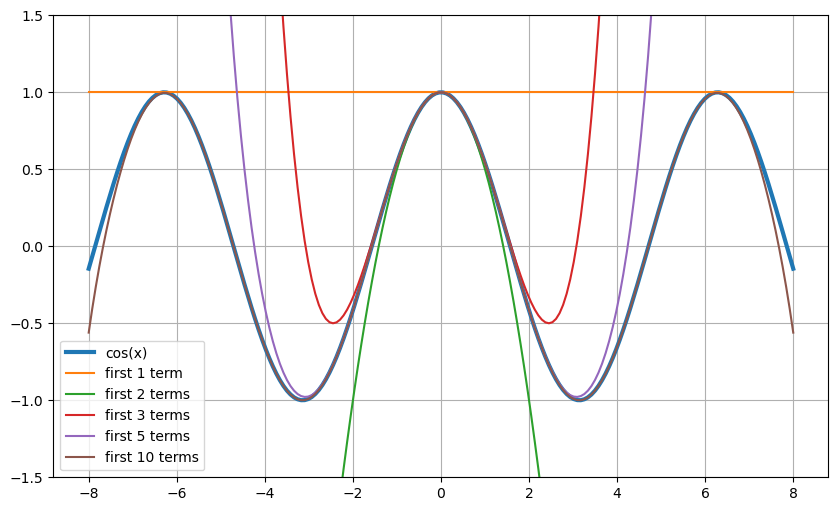

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

def taylor_series_cosine(x_,n):
    to_return=0
    for i in np.arange(n):
        to_return+=((-1)**(i))*(x_**(2*i))/factorial(2*i)
    return to_return

x_=np.linspace(-8,8,200)

plt.figure(figsize=(10,6))

plt.plot(x_,np.cos(x_),linewidth=3,label='cos(x)')
plt.plot(x_,taylor_series_cosine(x_,1),label = 'first 1 term')
plt.plot(x_,taylor_series_cosine(x_,2),label = 'first 2 terms')
plt.plot(x_,taylor_series_cosine(x_,3),label = 'first 3 terms')
plt.plot(x_,taylor_series_cosine(x_,5),label = 'first 5 terms')
plt.plot(x_,taylor_series_cosine(x_,10),label = 'first 10 terms')

plt.ylim([-1.5,1.5])
plt.grid()
plt.legend()
plt.show()

Figure (1): A demonstration of the Taylor expansion. The blue curve is the function $f(x)=\cos(x)$ and the other lines are curves containing successively more terms of the Taylor approximation about $x=0$.

### 2.3 Exercises

Exercise 1: find the expression for (or just the first two terms) the Taylor expansion of $e^x$ around $x=0$.

Exercise 2: find the expression for (or just the first two terms) the Taylor expansion of $\cos(x)$ around $x=0$.

Exercise 3: find the expression for (or just the first two terms) the Taylor expansion of $\cos(x)$ around $x=\pi/3$.


### 2.4 List of common Taylor expansions:

1. $e^x=1+x+\frac{x^2}{2!}+\frac{x^3}{3!}+\ldots$
2. $\ln (1+x)=x-\frac{x^2}{2}+\frac{x^3}{3}-\ldots[$ only convergent for $-1<x \leq 1]$
3. $\frac{1}{1-x}=1+x+x^2+\ldots[$ only convergent for $-1<x<1]$
4. $\arctan (x)=x-\frac{x^3}{5}+\frac{x^5}{5}-\frac{x^7}{7}+\ldots[$ only convergent for $-1 \leq x \leq 1]$
5. $\sin (x)=x-\frac{x^3}{3!}+\frac{x^5}{5!}-\ldots$
6. $\cos (x)=1-\frac{x^2}{2!}+\frac{x^4}{4!}-\ldots$

## 3. Power Series

Taylor series are a specific type of power series. We would not delve into a formal definition, but it is worth knowing that power series are of the form:
\begin{equation}
f(x)=\sum_{n=0}^{\infty} c_n(x-a)^n= c_0+c_1(x-a)+c_2(x-a)^2+ \ldots , 
\end{equation}
where $c_n$ are the $\textit{n}$th coefficients and $x=a$ is the $\textit{center}$ of the series, i.e. where it converges to.
From this expression, we can see that Taylor expansions is a power series with coefficients 
\begin{equation}
c_n = \frac{f^{(n)}(a)}{n!}.
\end{equation}

From Equations (3) and (4), you can see that a function can be expressed as a sum of powers of $x$. This is really powerful technique as it shows that any functions can be described by the infinite sum of simpler functions (if you are familiar with the term, these simpler functions are called \textit{bases}).


## 3.1 Fourier Series

A periodic function is a function that repeats its values at constant intervals. For instance, sines and cosines are periodic functions with period $2\pi$.

Similarly to power series, periodic functions can be expressed as a sum of simpler functions, in this case, sines and cosines. This is the Fourier series expansion:
\begin{equation}
f(x)=\frac{1}{2}a_0 + \sum^{\infty}_{n=1} a_n \cos nx + \sum^{\infty}_{n=1} b_n \sin nx ,
\end{equation}
where $a_n$ and $b_n$ are the coefficients of the series.

This will be dealt with more detail in the lecture on $\textit{Fourier Analysis}$.